In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [62]:
class PublicGoodsModel():
    
    def plot_grid_richness(self):
        plot_grid_revenue = np.zeros((self.width, self.height),dtype=np.float64) 
        for x in range(self.width):
            for y in range(self.height):
                richness = self.grid[x][y].status
                if richness == 'Rich':
                    plot_grid_revenue[x][y] = 1
                elif richness == 'Poor':
                    plot_grid_revenue[x][y] = 0
        x = np.arange(self.width + 1)
        y = np.arange(self.height + 1)
        fig, ax = plt.subplots()
        ax.set_title('Richness')
        ax.pcolormesh(x, y, plot_grid_revenue, shading='flat', vmin=0, vmax=1)
        
    def plot_grid_strategy(self):
        plot_grid_strat = np.zeros((self.width, self.height),dtype=np.float64)
        for x in range(self.width):
            for y in range(self.height):
                strat = self.grid[x][y].strategy
                if strat == 'D':
                    plot_grid_strat[x][y] = 0
                elif strat == 'C':
                    plot_grid_strat[x][y] = 1
        x = np.arange(self.width + 1)
        y = np.arange(self.height + 1)
        fig, ax = plt.subplots()
        ax.set_title('Cooperation')
        ax.pcolormesh(x, y, plot_grid_strat, shading='flat', vmin=0, vmax=1)
        
    def __init__(self, density, width, height, r_factor, density_def, richness_rate, R1=1, R2=1):
        self.grid = np.zeros((width, height),dtype=EconomicAgent)
        self.width, self.height = width, height
        self.r_factor, self.R1, self.R2 = r_factor, R1, R2
        self.b_pay = 2/self.r_factor
        self.c_pay = (R2-R1)/R1
        self.defectors, self.cooperators = np.array([]), np.array([])
        ag_id, self.N = 0, 0
        self.agents = []
        PublicGoodsModel.create_payoff_matrix(self)
        for x in range(self.width):
            for y in range(self.height):
                fate = random.uniform(0,1)
                coop_defect = random.uniform(0,1)
                if fate <= richness_rate:
                    fate = 0 # Poor Agent
                else:
                    fate = 1 # Rich Agent
                if coop_defect <= density_def:
                    coop_defect = 0 # Defector
                else:
                    coop_defect = 1 # Cooperator
                if density >= random.uniform(0,1):
                    ag = EconomicAgent(ag_id, coop_defect, fate, True)
                    ag.set_coord(x,y)
                    self.agents.append(ag)
                    self.grid[x][y] = ag
                    ag_id += 1
                    self.N += 1
                else:
                    ag = EconomicAgent(ag_id, coop_defect, fate, False)
                    ag.set_coord(x,y)
                    self.agents.append(ag)
                    self.grid[x][y] = ag
                    ag_id += 1
                    
    def get_neighbors(self, x, y, x_thresh=0, y_tresh=0):
        if type(x)==int and type(y)==int:
            # Horizontal Neighbors
            if x == self.width-1:
                right_neighbor = [0, y]
                left_neighbor = [x-1, y]
            elif x == 0:
                right_neighbor = [x+1, y]
                left_neighbor = [self.width-1, y]
            else:
                right_neighbor = [x+1, y]
                left_neighbor = [x-1, y]
            # Vertical Neighbors
            if y == self.height-1:
                upper_neighbor = [x, 0]
                lower_neighbor = [x, y-1]
            elif y == 0:
                upper_neighbor = [x, y+1]
                lower_neighbor = [x, self.height-1]
            else:
                upper_neighbor = [x, y+1]
                lower_neighbor = [x, y-1]
            # Clockwise direction 
            return upper_neighbor, right_neighbor, lower_neighbor, left_neighbor
        else:
            return None
        
    def create_payoff_matrix(self):
        self.payoff_m = np.zeros((4, 4),dtype=np.float64)
        self.payoff_m[0][0] =  (2*self.c_pay) + 1 # CC RICH-RICH
        self.payoff_m[0][1] =  (self.c_pay)       # CD RICH-RICH
        self.payoff_m[0][2] =  self.c_pay + 1     # CC RICH-POOR
        self.payoff_m[0][3] =  self.c_pay         # CD RICH-POOR
        self.payoff_m[1][0] =  (self.c_pay*self.b_pay) + self.b_pay + self.c_pay # DC RICH-RICH
        self.payoff_m[1][1] =  (self.c_pay*self.b_pay) + self.b_pay - 1          # DD RICH-RICH
        self.payoff_m[1][2] =  (self.c_pay*self.b_pay) + self.b_pay              # DC RICH-POOR
        self.payoff_m[1][3] =  (self.c_pay*self.b_pay) + self.b_pay - 1          # DD RICH-POOR
        self.payoff_m[2][0] =  self.c_pay + 1 # CC POOR-RICH
        self.payoff_m[2][1] =  0              # CD POOR-RICH
        self.payoff_m[2][2] =  self.c_pay + self.b_pay # CC POOR-POOR
        self.payoff_m[2][3] =  self.b_pay - 1          # CD POOR-POOR
        self.payoff_m[3][0] =  1 # DC POOR-RICH
        self.payoff_m[3][1] =  0 # DD POOR-RICH
        self.payoff_m[3][2] =  self.b_pay     # DC POOR-POOR
        self.payoff_m[3][3] =  self.b_pay - 1 # DD POOR-POOR
        print(self.payoff_m)
        
    def payoff_matrix(self, status_one, status_two, strat_one, strat_two):
        if status_one == 'Rich':
            if status_two == 'Rich':
                if strat_one == 'C':
                    if strat_two == 'C': # CC RICH-RICH
                        return (2*self.c_pay) + 1
                    else: # CD RICH-RICH
                        return self.c_pay
                else:
                    if strat_two == 'C': # DC RICH-RICH
                        return (self.c_pay*self.b_pay) + self.b_pay + self.c_pay
                    else: # DD RICH-RICH
                        return (self.c_pay*self.b_pay) + self.b_pay - 1
            else:
                if strat_one == 'C':
                    if strat_two == 'C': # CC RICH-POOR
                        return self.c_pay + 1
                    else: # CD RICH-POOR
                        return self.c_pay
                else:
                    if strat_two == 'C': # DC RICH-POOR
                        return (self.c_pay*self.b_pay) + self.b_pay
                    else: # DD RICH-POOR
                        return (self.c_pay*self.b_pay) + self.b_pay - 1
        else: # Poor
            if status_two == 'Rich':
                if strat_one == 'C':
                    if strat_two == 'C': # CC POOR-RICH
                        return self.c_pay + 1
                    else: # CD POOR-RICH
                        return 0
                else:
                    if strat_two == 'C': # DC POOR-RICH
                        return self.c_pay + self.b_pay
                    else: # DD POOR-RICH
                        return self.b_pay - 1
            else:
                if strat_one == 'C':
                    if strat_two == 'C': # CC POOR-POOR
                        return 1
                    else: # CD POOR-POOR
                        return 0
                else:
                    if strat_two == 'C': # DC POOR-POOR
                        return self.b_pay
                    else: # DD POOR-POOR
                        return self.b_pay - 1
                    
    def change_strategy(self, agent_strat, neighbors_strategy, neighbors_payoffs):
        def inverse(strat):
            x = random.uniform(0,1)
            if x <= 0.05:
                if strat == 'C':
                    return 'D'
                elif strat == 'D':
                    return 'C'
            else:
                return strat
        total_payoff = neighbors_payoffs[-1]
        if total_payoff != 0:
            p = random.uniform(0,1)
            #print(p*neighbors_payoffs[-1])
            if p <= neighbors_payoffs[0]/total_payoff:
                return inverse(neighbors_strategy[0])
            elif p <= (neighbors_payoffs[1])/total_payoff:
                return inverse(neighbors_strategy[1])
            elif p <= (neighbors_payoffs[2])/total_payoff:
                return inverse(neighbors_strategy[2])
            elif p <= (neighbors_payoffs[3])/total_payoff:
                return inverse(neighbors_strategy[3])
            else:
                return inverse(neighbors_strategy[4])
        else:
            return inverse(neighbors_strategy[4])
        
    def step(self):
        coop, defe = 0, 0
        for agent in self.agents:
            agent.payoff = 0
            x,y = agent.get_coord()
            neighbors = PublicGoodsModel.get_neighbors(self, x, y)
            agent_act, agent_status, agent_strat = agent.get_general_status()
            if agent_act:
                for neighbor in neighbors:
                    act, status, strat = self.grid[neighbor[0]][neighbor[1]].get_general_status()
                    if act:
                        payoff = PublicGoodsModel.payoff_matrix(self, agent_status, status, agent_strat, strat)
                        agent.payoff += payoff
                        #self.grid[neighbor[0]][neighbor[1]].payoff = payoff
        # CHANGE STRATEGY
        for agent in self.agents:
            x,y = agent.get_coord()
            neighbors = PublicGoodsModel.get_neighbors(self, x, y)
            agent_act, agent_status, agent_strat = agent.get_general_status()
            if agent_act:
                neighbors_payoff = []
                neighbors_strategy = []
                for n_agent in range(len(neighbors)):
                    neighbor = neighbors[n_agent]
                    act, status, strat = self.grid[neighbor[0]][neighbor[1]].get_general_status()
                    if act:
                        neighbors_payoff.append(self.grid[neighbor[0]][neighbor[1]].payoff)
                        neighbors_strategy.append(self.grid[neighbor[0]][neighbor[1]].strategy)
                        if n_agent > 0:
                            neighbors_payoff[n_agent] += neighbors_payoff[n_agent-1]
                neighbors_payoff.append(agent.payoff)
                neighbors_payoff[-1] += neighbors_payoff[-2]
                neighbors_strategy.append(agent_strat)
                agent.strategy = PublicGoodsModel.change_strategy(self, agent_strat, neighbors_strategy, neighbors_payoff)
                if agent.strategy == 'C':
                    coop += 1
                elif agent.strategy == 'D':
                    defe += 1
        self.defectors = np.append(self.defectors,values=(defe/self.N),axis=None)
        self.cooperators = np.append(self.cooperators,values=(coop/self.N),axis=None)
        
    def plot_population_strategies(self):
        fig, ax = plt.subplots()
        x = np.linspace(0, 1, len(self.defectors))
        ax.set_title('Cooperators x Defectors')
        ax.plot(x, self.cooperators, 'b')
        ax.plot(x, self.defectors, 'r')

class EconomicAgent():
    
    def set_coord(self, x, y):
        self.x = x
        self.y = y
    
    def __init__(self, ag_id, defector, condition, life=True):
        self.id = ag_id
        self.payoff = 0
        if not life:
            self.activity = False # Dead Agent
        else:
            if condition == 0:
                self.activity = True # Alive - Poor
                self.status = 'Poor'
            elif condition == 1:
                self.activity = True # Alive - Rich
                self.status = 'Rich'
        # AGENT'S STRATEGY
        if defector == 0:
            self.strategy = 'D'
        else:
            self.strategy = 'C'
            
    def get_general_status(self):
        if self.activity:
            return True, self.status, self.strategy
        else: 
            return False, None, None
        
    def get_coord(self):
        return self.x, self.y

[[1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]]


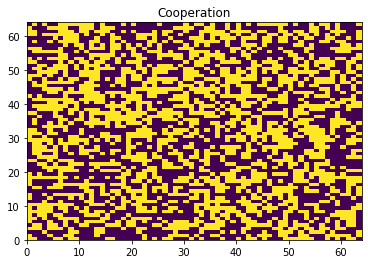

In [63]:
model = PublicGoodsModel(density=1, width=64, height=64, r_factor=2.0, density_def=0.5, richness_rate=0.5, R1=1, R2=1)
model.plot_grid_strategy()

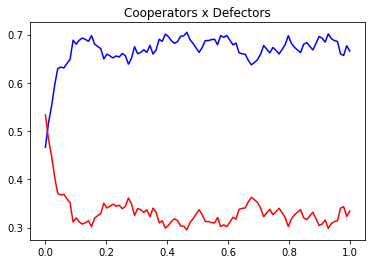

In [64]:
for x in range(100):
    model.step()
model.plot_population_strategies()

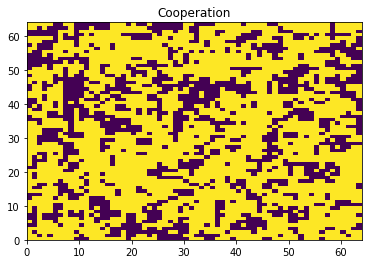

In [65]:
model.plot_grid_strategy()